# Goals For Project
- Determine whether a visitor will generate revenue for a company of not 
- Provide Data Visualizations 
- Provide Statistical Analysis
- Build an Artificial Neural Network to predict the likelihood of a visitor generating revenue for the company

In [9]:
import sys
!{sys.executable} -m pip install tensorflow==1.13.2
#!pip3 install tensorflow

     |████████████████████████████████| 73.6 MB 115 kB/s eta 0:00:01    |███                             | 7.0 MB 6.0 MB/s eta 0:00:12     |█████▌                          | 12.6 MB 6.0 MB/s eta 0:00:11     |████████████████████████▏       | 55.6 MB 5.9 MB/s eta 0:00:04     |██████████████████████████▋     | 61.2 MB 1.8 MB/s eta 0:00:08     |████████████████████████████▋   | 65.8 MB 5.1 MB/s eta 0:00:02     |█████████████████████████████▋  | 68.0 MB 5.1 MB/s eta 0:00:02
  Using cached tensorflow_estimator-1.13.0-py2.py3-none-any.whl (367 kB)
  Using cached tensorboard-1.13.1-py3-none-any.whl (3.2 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.0
    Uninstalling tensorboard-2.1.0:
      Successfully uninstalled tensorboard-2.1.0
  Attempting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv('online_shoppers_intention.csv')
df.sample(5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5818,7,123.2,0,0.0,16,283.721429,0.014474,0.022222,0.000000,0.0,Jul,3,2,3,13,Returning_Visitor,False,False
8381,4,112.5,0,0.0,26,1657.000000,0.007407,0.020988,5.237225,0.0,Nov,2,2,1,13,Returning_Visitor,False,False
11672,0,0.0,0,0.0,2,66.500000,0.066667,0.166667,0.000000,0.0,Nov,3,2,3,13,Returning_Visitor,False,False
11710,0,0.0,0,0.0,14,1947.500000,0.000000,0.021429,0.000000,0.0,Nov,1,1,1,3,Returning_Visitor,False,False
11040,0,0.0,1,0.0,10,210.250000,0.000000,0.018182,0.000000,0.0,Nov,1,1,1,2,New_Visitor,False,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [3]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


- The mean of each column is very varied from one another and hence scaling should help with it. Considering that Revenue is the target column, I'll split the dataset into test and train sets

In [4]:
df.shape

(12330, 18)

- There are 18 columns, 17 features and 1 target variable (Revenue)
- Considering that Revenue as the target column, I'll split the dataset into test and train sets. I split the dataset into 80% training data and 20% testing data.

# Data Analysis & Visualization 

## Normal / Gaussian

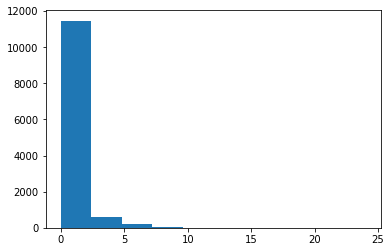

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# mu = 0.503569
# sigma = 1.270156
# values = np.random.normal(mu, sigma, 12330)
values = df['Informational']
plt.hist(values, 10)
plt.show()

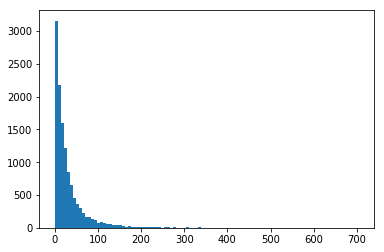

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# mu = 0.503569
# sigma = 1.270156
# values = np.random.normal(mu, sigma, 12330)
values = df['ProductRelated']
plt.hist(values, 100)
plt.show()

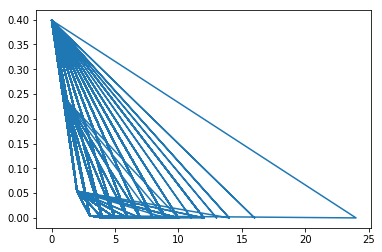

In [7]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x = df['Informational']
plt.plot(x, norm.pdf(x))


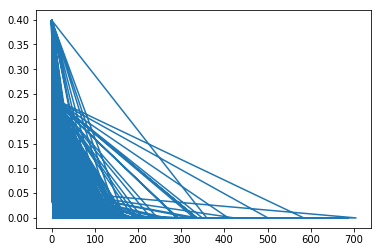

In [17]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x = df['ProductRelated']
plt.plot(x, norm.pdf(x))


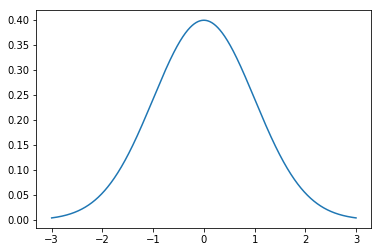

In [18]:
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x))

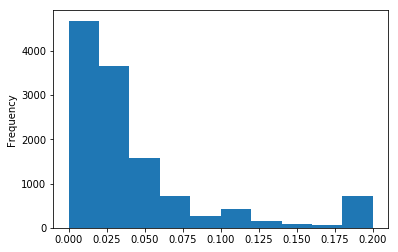

In [19]:
df['ExitRates'].plot.hist()

In [20]:
e = df['ExitRates'].tolist()
def find_outliers(dataset):
    data_mean, data_std = np.mean(dataset), np.std(dataset)
    
    IQR = data_std * 3
    lower, upper = data_mean - IQR, data_mean + IQR
    outliers = []
    non_outliers = []
    for x in dataset:
        if x < lower and x > upper:
            outliers.append(x)
    for x in dataset:
        if x > lower and x < upper:
            non_outliers.append(x)
    return outliers#, non_outliers
print(find_outliers(e))  

[]


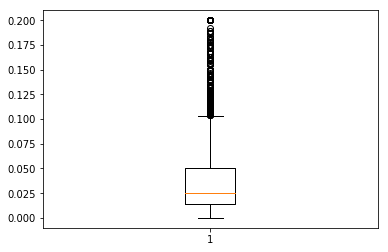

In [54]:
import matplotlib.pyplot as plt

plt.boxplot(e)

plt.show()

In [52]:
i = df['ProductRelated_Duration'].tolist()
def find_outliers(dataset):
    data_mean, data_std = np.mean(dataset), np.std(dataset)
    
    IQR = data_std * 3
    lower, upper = data_mean - IQR, data_mean + IQR
    outliers = []
    non_outliers = []
    for x in dataset:
        if x < lower and x > upper:
            outliers.append(x)
    for x in dataset:
        if x > lower and x < upper:
            non_outliers.append(x)
    return outliers#, non_outliers
print(find_outliers(i))

[]


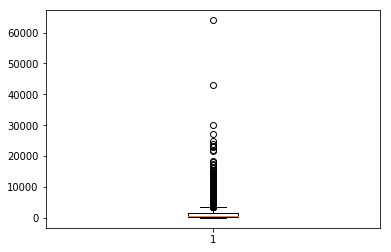

In [27]:
import matplotlib.pyplot as plt

plt.boxplot(i)

plt.show()

## Train/Test Split Data

In [28]:
X = df.iloc[:, :-1] # everything except revenue column bc it's categorical data
y = df.iloc[:, -1] # only revenue column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.reset_index(inplace = True)
X_test.reset_index(inplace = True)

### Target Column (Revenue)

Text(0.5, 1.0, 'Count of visitors based on revenue generated')

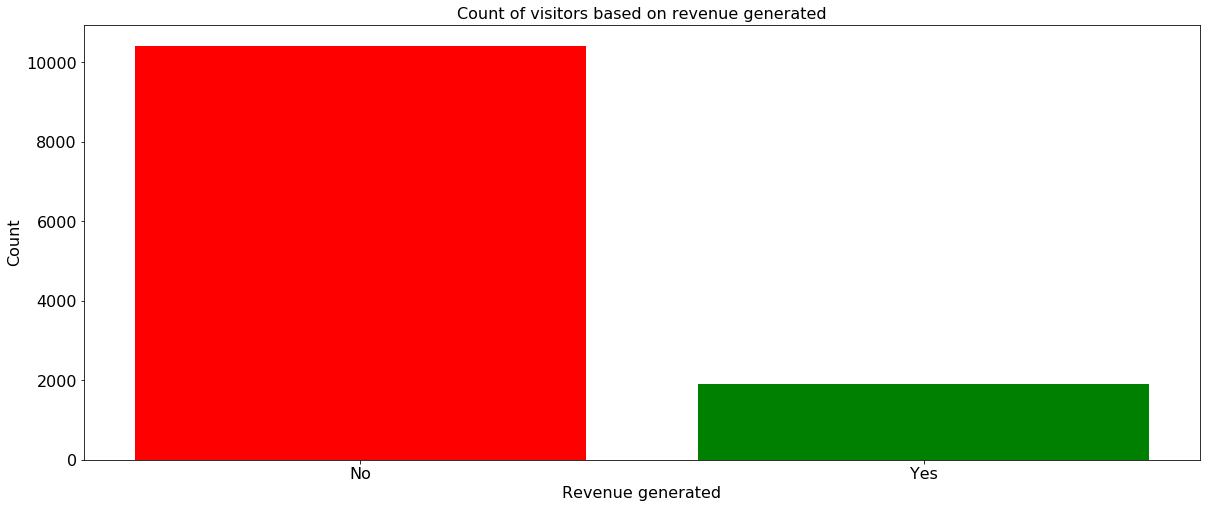

In [29]:
target_distribution = y.value_counts()
plt.figure(figsize = (20, 8))
plt.bar(target_distribution.keys().tolist(), target_distribution.tolist(), color = ['red', 'green'])
plt.xlabel('Revenue generated', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks([0.0, 1.0], ['No', 'Yes'], fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Count of visitors based on revenue generated', fontsize = 16)

The majority of the dataset has features that generated no revenue. The dataset is unbalanced so hopefully we can train a model that can easily classify b/w the two  

In [30]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


- It Appears the PageValues is the most heavily correlated with generating revenue. Also, features such as OperatingSystems, Region and TrafficType have correlation less than 0.02, so I'll drop these columns.
- The relation between Administrative and Administrative_Duration, Informational and Informational_Duration and ProductRelated and ProductRelated_Duration appear to have a very high correlation. This makes sense due to the more time spent on a page, the more views the page is likely to have. Therefore, we can remove the Traffic Type. 

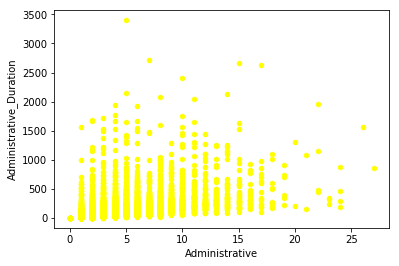

In [31]:
df.plot(kind='scatter',x='Administrative',y='Administrative_Duration',color='yellow')
plt.show()

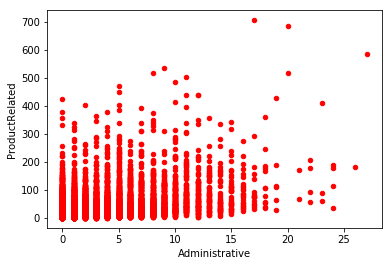

In [32]:
df.plot(kind='scatter',x='Administrative',y='ProductRelated',color='red')
plt.show()

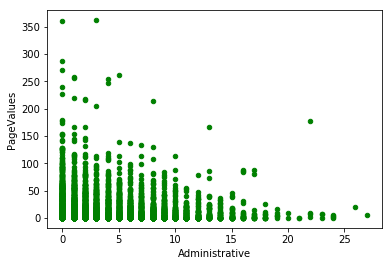

In [33]:
df.plot(kind='scatter',x='Administrative',y='PageValues',color='green')
plt.show()

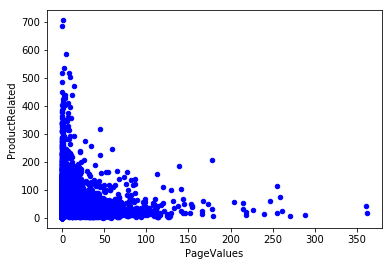

In [116]:
df.plot(kind='scatter',x='PageValues',y='ProductRelated',color='blue')
plt.show()

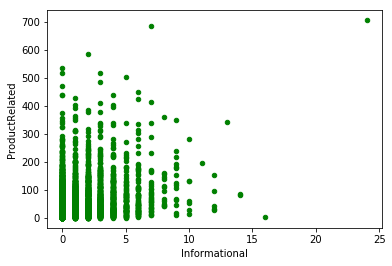

In [118]:
df.plot(kind='scatter',x='Informational',y='ProductRelated',color='green')
plt.show()

In [122]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5855,1,65.400000,0,0.0,37,2097.420000,0.003604,0.010991,0.000000,0.0,Jul,1,1,5,2,Returning_Visitor,False,False
1876,4,179.607143,2,5.5,34,1045.102381,0.000000,0.007603,0.000000,0.0,Mar,1,1,1,3,Returning_Visitor,False,False
10245,12,209.375000,0,0.0,43,2754.117424,0.004687,0.033875,13.681089,0.0,Dec,3,2,3,2,Returning_Visitor,False,False
1494,1,19.000000,0,0.0,22,525.266667,0.000000,0.007710,0.000000,0.0,Mar,3,2,7,1,Returning_Visitor,False,False
3099,0,0.000000,1,20.0,13,816.954545,0.028571,0.047619,0.000000,0.0,May,3,2,8,1,Returning_Visitor,False,False


## Unpaired T-Test

- Here we want to see if the time it took for the Informational Duration is different from the relationship of the product.
- This requires a two sample ttest because the samples we are looking at come from populations with unequal variances we can set the equal_var parameter in the test to False.

In [135]:
from scipy import stats
product_related = df['ProductRelated']
product_duration = df['Informational_Duration']
# assuming same population variances
two_sample = stats.ttest_ind(product_related, product_duration)

print("The t-statistic is %.3f and the p-value is %.3f." % two_sample)

# assuming unequal population variances
two_sample_diff_var = stats.ttest_ind(product_related, product_duration, equal_var=False)

print("If we assume unequal variances than the t-statistic is %.3f and the p-value is %.3f." % two_sample_diff_var)

The t-statistic is -2.062 and the p-value is 0.039.
If we assume unequal variances than the t-statistic is -2.062 and the p-value is 0.039.


## Result
- Reject the Null Hypthesis. 
- The p-values < 0.05.
- Here we conclude that informational duration and the relationship to the product are different 

# Data Engineering 

- Remove redundant columns

### Remove Columns

I'll remove columns that appear to be redundant and provide no useful information towards the target class. I'll begin by dropping the count of each page visited.

In [119]:
X_train = X_train.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)
X_test = X_test.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)

I'll remove columns that have less than 0.02 and more than -0.02 correlation with target values.

In [120]:
X_train.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)
X_test.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)

### Encoding Categorical Columns
- The LabelEncoder allows us to to assign ordinal levels to categorical data. Note that the LabelEncoder must be used prior to one-hot encoding, as the OneHotEncoder cannot handle categorical data. Therefore, it is frequently used as pre-cursor to one-hot encoding.

Next, I'll use LabelEncoder and OneHotEncoder on categorical columns.

In [96]:
labelEncoder = LabelEncoder()
X_train.loc[:, 'Month'] = labelEncoder.fit_transform(X_train.loc[:,'Month'])
X_test.loc[:, 'Month'] = labelEncoder.transform(X_test.loc[:, 'Month'])
X_train.loc[:, 'VisitorType'] = labelEncoder.fit_transform(X_train.loc[:, 'VisitorType'])
X_test.loc[:, 'VisitorType'] = labelEncoder.transform(X_test.loc[:, 'VisitorType'])
X_train.loc[:, 'Weekend'] = labelEncoder.fit_transform(X_train.loc[:, 'Weekend'])
X_test.loc[:, 'Weekend'] = labelEncoder.transform(X_test.loc[:, 'Weekend'])

- Once the labels are encoded, I'll use OneHotEncoder to create separate columns for each class in the columns, drop the first column for each class and append the new columns to train and test data, once the original columns are removed.

In [97]:
onehotencoder = OneHotEncoder(categories = 'auto', drop = 'first')
train_cat_features = onehotencoder.fit_transform(X_train.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
train_cat_features = pd.DataFrame(train_cat_features)
test_cat_features = onehotencoder.transform(X_test.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
test_cat_features = pd.DataFrame(test_cat_features)

X_train.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
X_train = X_train.join(train_cat_features)
X_test.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
X_test = X_test.join(test_cat_features)

### Scaling The Data

- After removing columns. Scale the columns to have a mean of 0

In [98]:
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

## Model Generation

I'll create the Artificial Neural Network now. I'll create network with many layers.

In [33]:
classifier = Sequential()
classifier.add(Dense(units = 128, activation = 'relu', input_dim=32))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.4))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

W0214 16:15:19.771640 4321082816 nn_ops.py:4283] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0214 16:15:19.849551 4321082816 nn_ops.py:4283] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0214 16:15:19.891057 4321082816 nn_ops.py:4283] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0214 16:15:19.998759 4321082816 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

## Training The Model

- I'll now train the model with the train data and the validation data as 10% of the train data.

In [35]:
history = classifier.fit(X_train, y_train, epochs = 50, shuffle=False, validation_split=0.1)

Train on 8877 samples, validate on 987 samples
Epoch 1/50
8877/8877 [==============================] - 3s 313us/step - loss: 0.4211 - accuracy: 0.8462 - val_loss: 0.3269 - val_accuracy: 0.8723
Epoch 2/50
8877/8877 [==============================] - 1s 134us/step - loss: 0.3357 - accuracy: 0.8654 - val_loss: 0.2892 - val_accuracy: 0.8804
Epoch 3/50
8877/8877 [==============================] - 1s 154us/step - loss: 0.3134 - accuracy: 0.8786 - val_loss: 0.2931 - val_accuracy: 0.8815
Epoch 4/50
8877/8877 [==============================] - 1s 144us/step - loss: 0.2967 - accuracy: 0.8827 - val_loss: 0.2794 - val_accuracy: 0.8835
Epoch 5/50
8877/8877 [==============================] - 1s 120us/step - loss: 0.2873 - accuracy: 0.8892 - val_loss: 0.2775 - val_accuracy: 0.8845
Epoch 6/50
8877/8877 [==============================] - 1s 109us/step - loss: 0.2860 - accuracy: 0.8883 - val_loss: 0.2709 - val_accuracy: 0.8855
Epoch 7/50
8877/8877 [==============================] - 1s 111us/step - loss:

### I'll output the prediction on the test data and evaluate the Confusion Matrix and Accuracy.

In [36]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

print('Confusion matrix: ')
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Confusion matrix: 
[[1946  109]
 [ 169  242]]
Accuracy: 88.73%


# Conclusion

The confusion matrix helps us understand the visitors who will generate revenue and who won't.Once the prediction of our model is made based on if they will generate revenue, two things will happen:

1. If they're predicted to generate revenue then we don't have to give them coupons to buy, but we could give them points on their account that they can use for future purchases.
2. If they're not predicted to generate revenue then we can provide them with discounts/coupons to get them to make a purchase.